# M1 Coursework - Question 5

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
np.random.seed(30)  

# Import MNIST data - as done in Q1

In [22]:
# Import initial data set from mnist
# x_train_val - will be split into training and validation sets
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()

# Determine how many parameter values are in the data set
num_params = len(np.unique(y_test))

# Normalise the data
x_train_val = x_train_val / 255
x_test = x_test / 255

# Set the data type to float32
x_train_val = x_train_val.astype('float32')
x_test = x_test.astype('float32')

# Randomly shuffle data to ensure even distribution of labels
# Shuffle 60,000 data set
indices_train_val = np.arange(len(x_train_val))
np.random.shuffle(indices_train_val)
x_train_val = x_train_val[indices_train_val]
y_train_val = y_train_val[indices_train_val]

# Shuffle 10,000 data set
indices_test = np.arange(len(x_test))
np.random.shuffle(indices_test)
x_test = x_test[indices_test]
y_test = y_test[indices_test]

# Split test_val data into training and validation sets()
split_index = int(0.8 * len(x_train_val)) 
# 80 % going to training set
x_train = x_train_val[:split_index] 
y_train = y_train_val[:split_index]
# 20 % going to validation set
x_val = x_train_val[split_index:]
y_val = y_train_val[split_index:]

# Create v stack input data 
train_double_size = 100000
val_double_size = 15000
test_double_size = 15000

# Generate random indices for the double data set
# Vectorised sampling with replacement
train_double_indices =  [np.random.randint(0, x_train.shape[0], train_double_size), np.random.randint(0, x_train.shape[0], train_double_size)]

val_double_indices =  [np.random.randint(0, x_val.shape[0], val_double_size), np.random.randint(0, x_val.shape[0], val_double_size)]

test_double_indices =  [np.random.randint(0, x_test.shape[0], test_double_size), np.random.randint(0, x_test.shape[0], test_double_size)]


# Generate their corresponding images and labels at these indices

x_train_double = np.concatenate((x_train[train_double_indices[0]], x_train[train_double_indices[1]]), axis=1) 
y_train_double = np.add(y_train[train_double_indices[0]], y_train[train_double_indices[1]])

x_val_double = np.concatenate((x_val[val_double_indices[0]], x_val[val_double_indices[1]]), axis=1)
y_val_double = np.add(y_val[val_double_indices[0]], y_val[val_double_indices[1]])

x_test_double = np.concatenate((x_test[test_double_indices[0]], x_test[test_double_indices[1]]), axis=1)
y_test_double = np.add(y_test[test_double_indices[0]], y_test[test_double_indices[1]])

## Load Model from Fiile - From Question 2

In [23]:
model_best_file = tf.keras.models.load_model('Results/mnist_double_best_model.keras')
model_best_file.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)            │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 877)            │     1,376,013 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 877)            │         3,508 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_105 (Activation)     │ (None, 877)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 877)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 622)            │       546,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 622)            │         2,488 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_106 (Activation)     │ (None, 622)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_106 (Dropout)           │ (None, 622)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 441)            │       274,743 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_107         │ (None, 441)            │         1,764 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_107 (Activation)     │ (None, 441)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 441)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 19)             │         8,398 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,631,332 (25.30 MB)

 Trainable params: 2,209,150 (8.43 MB)

 Non-trainable params: 3,880 (15.16 KB)

 Optimizer params: 4,418,302 (16.85 MB)

### Extract the embedding layers results for Test dataset

In [24]:
# Define function that extracts the intermediate output of a specific layer by looping through all layers 
def get_intermediate_output(model, layer_name, input_data):
    output = input_data
    for layer in model.layers:
        output = layer(output)
        if layer.name == layer_name:
            break
    return output

# Define the embedding layer name
embedding_layer_name = 'dense_177'

# Find the embeddings of the test data
embeddings = get_intermediate_output(model_best_file, embedding_layer_name, x_test_double).numpy()

### Optimise Silhoutte Score with Perplexity

In [ ]:
# Function to optimise perplexity
def optimize_tsne(data, labels, perplexity_values):
    scores = []
    results = {}
    
    for perplexity in perplexity_values:
        print(f"Running t-SNE with perplexity={perplexity}")

        # Run t-SNE for given perplexity
        tsne_result = TSNE(n_components=2, perplexity=perplexity).fit_transform(data)
        
        # Calculate silhouette score as optimisation metric
        score = silhouette_score(tsne_result, labels)
        scores.append(score)
        print(f"Silhouette score for perplexity={perplexity}: {score}")

        # Save results
        results[perplexity] = tsne_result
    
    # Find the index of the max score
    best_index = np.argmax(scores)
    # Get perplexity corresponding to the best score
    best_perplexity = perplexity_values[best_index]  
    best_score = scores[best_index]

    print(f"Best perplexity: {best_perplexity} with silhouette score: {best_score}")

    return results, scores, best_perplexity

# Example perplexity values to test
perplexity_values = [1, 10, 50, 100, 250, 500, 1000, 5000, 10000]

# Define the labels 
y_test_double_values = y_test_double

# Optimise t-SNE for the embedding layer
print("Optimizing t-SNE for Embedding Layer")
tsne_embed_result, score_embed, best_perplexity_embed= optimize_tsne(embeddings, y_test_double_values, perplexity_values)

# Optimise t-SNE for the input layer
print("Optimizing t-SNE for Input Layer...")
x_test_flat = x_test_double.reshape(x_test_double.shape[0], -1)
tsne_input_result, score_input, best_perplexity_input = optimize_tsne(x_test_flat, y_test_double_values, perplexity_values)

Optimizing t-SNE for Embedding Layer
Running t-SNE with perplexity=1
Silhouette score for perplexity=1: -0.021908070892095566
Running t-SNE with perplexity=10
Silhouette score for perplexity=10: 0.026858419179916382
Running t-SNE with perplexity=50
Silhouette score for perplexity=50: 0.2998208999633789
Running t-SNE with perplexity=100
Silhouette score for perplexity=100: 0.39399173855781555
Running t-SNE with perplexity=250
Silhouette score for perplexity=250: 0.5923672914505005
Running t-SNE with perplexity=500
Silhouette score for perplexity=500: 0.6844190359115601
Running t-SNE with perplexity=1000
Silhouette score for perplexity=1000: 0.729206919670105
Running t-SNE with perplexity=5000
Silhouette score for perplexity=5000: 0.7033012509346008
Running t-SNE with perplexity=10000
Silhouette score for perplexity=10000: 0.7389925718307495
Best perplexity: 10000 with silhouette score: 0.7389925718307495
Optimizing t-SNE for Input Layer...
Running t-SNE with perplexity=1
Silhouette scor

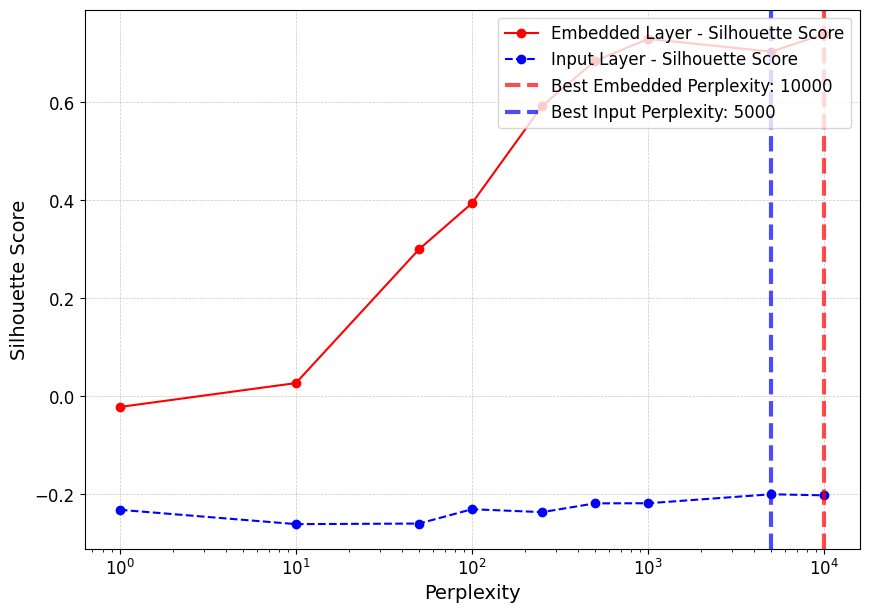

In [29]:
# Create a plot of perplexity Silhouette Score against perplexity
plt.figure(figsize=(10, 7))

# Plot for the embedding layer
plt.plot(perplexity_values,[score_embed[p] for p in range(len(perplexity_values))], marker='o', color = 'red', label='Embedded Layer - Silhouette Score', 
         linestyle='-',linewidth=1.5,markersize=6)

# Plot for the input layer
plt.plot(perplexity_values, [score_input[p] for p in range(len(perplexity_values))], marker='o', color = 'blue', label='Input Layer - Silhouette Score',
         linestyle='--', linewidth=1.5, markersize=6)

plt.axvline(best_perplexity_embed, color='red', linestyle='--', linewidth=3, alpha=0.7, label = f'Best Embedded Perplexity: {best_perplexity_embed}')
plt.axvline(best_perplexity_input, color='blue', linestyle='--', linewidth=3, alpha=0.7, label = f'Best Input Perplexity: {best_perplexity_input}')

plt.xlabel("Perplexity", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc = 'upper right')
plt.xscale('log')
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

### Run TSNE for optimal perplexity

In [27]:
# Compute for best perplexities
tsne_embed = TSNE(n_components=2, perplexity=best_perplexity_embed).fit_transform(embeddings)
tsne_input = TSNE(n_components=2, perplexity=best_perplexity_input).fit_transform(x_test_flat)

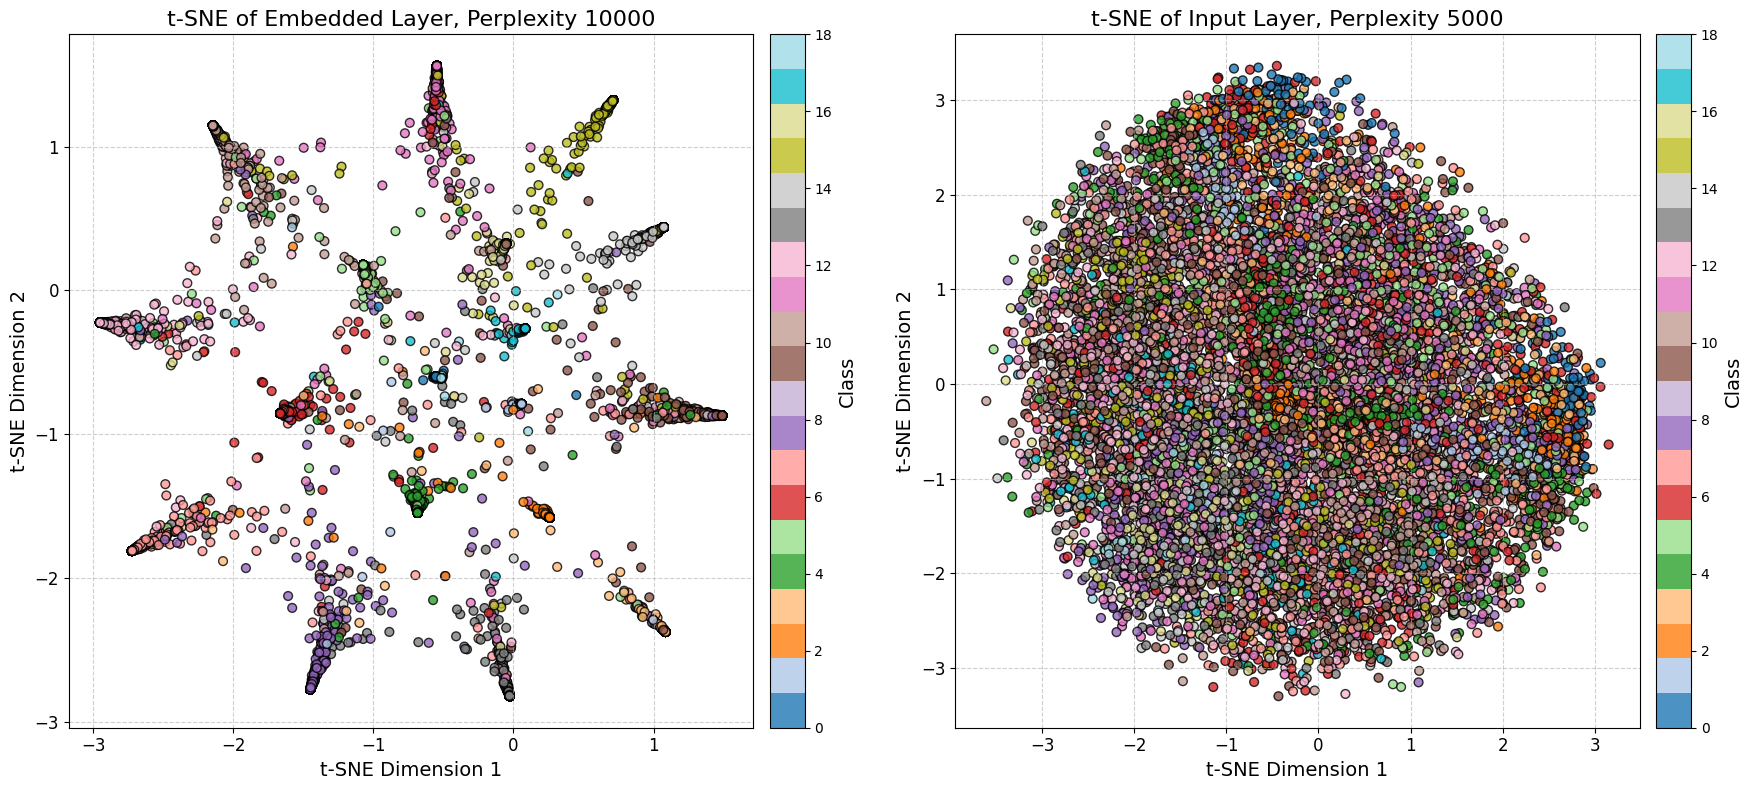

In [28]:
# Create a subplot structure
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) 

# Colormap with 19 unique colors (0 to 18)
colormap = plt.colormaps["tab20"](np.linspace(0, 1, 19))

# Plot t-SNE of embeddings
scatter1 = axes[0].scatter(tsne_embed[:, 0], tsne_embed[:, 1], c=y_test_double_values, cmap="tab20",
                           alpha=0.8, edgecolor='k', s=40)

cbar1 = fig.colorbar(scatter1, ax=axes[0], orientation="vertical", pad=0.02)
cbar1.set_label('Class', fontsize=14)
axes[0].set_xlabel("t-SNE Dimension 1", fontsize=14)
axes[0].set_ylabel("t-SNE Dimension 2", fontsize=14)
axes[0].tick_params(axis="both", which="major", labelsize=12)
axes[0].set_title(f"t-SNE of Embedded Layer, Perplexity {best_perplexity_embed}", fontsize=16)
axes[0].grid(linestyle="--", alpha=0.6)

# Plot t-SNE of raw input
scatter2 = axes[1].scatter(tsne_input[:, 0], tsne_input[:, 1], c=y_test_double_values, cmap="tab20",
                           alpha=0.8, edgecolor='k', s=40)

cbar2 = fig.colorbar(scatter2, ax=axes[1], orientation="vertical", pad=0.02)
cbar2.set_label('Class', fontsize=14)
axes[1].set_xlabel("t-SNE Dimension 1", fontsize=14)
axes[1].set_ylabel("t-SNE Dimension 2", fontsize=14)
axes[1].tick_params(axis="both", which="major", labelsize=12)
axes[1].set_title(f"t-SNE of Input Layer, Perplexity {best_perplexity_input}", fontsize=16)
axes[1].grid(linestyle="--", alpha=0.6)

# Adjust subplot layout for clarity and spacing
plt.tight_layout()

# Show the plot
plt.show()
